# TASK 1: Image reading and displaying

Image reading is a core functionality of any image processing algorithm and often available in the form of a function ‘imread()’. In this task you need to write your own ‘imread()’ function which can read .pgm images (pgm test dataset is given with this assignment). Once you read your image(s), you need display them with existing library call.

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [53]:
def convert_pgm_to_matrix(pgm):
    """
    convert_pgm_to_matrix
    read PGM images and return a matrix that store image pixels in grayscale

    Input: PGM image
    Output: image pixels in grayscale 
    """
    with open(pgm, 'rb') as f:
        # Check Format
        # which is the signature of the image file and PGM file format identification
        format = f.readline().decode("utf-8").rstrip('\n')
        if format != 'P5':
            raise "This function only support PGM with P5 format"

        # Check comment
        next_line = f.readline().decode("utf-8").rstrip('\n')
        while next_line.startswith('#'):
            next_line = f.readline().decode("utf-8").rstrip('\n')
        
        # Check Dimension
        shape = next_line.split(" ")
        num_rows = int(shape[1])
        num_columns = int(shape[0])

        # Get maximum grey level specify in the image
        max_grey_level = int(f.readline().decode("utf-8").rstrip('\n'))

        # Read pixel data
        pixel_data = f.read()
            
        # Convert binary data to ASCII
        pixels = [byte for byte in pixel_data]
        pic = np.array(pixels, dtype=int).reshape(num_rows, num_columns)

    # Create an image with that grayscale value
    ## TODO: Check why I need to normalize data in order to show
    # Normalize to the range [0, 1]
    grayscale_value = pic / max_grey_level  
    image_matrix = np.full((num_rows, num_columns), grayscale_value)

    return image_matrix


def show_image_greyscale(image_matrix):
    """
    show_image_greyscale
    shows image in greyscale

    Input: matrix of image pixels
    Output: shows image
    """
    plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()

./Dataset/man.pgm


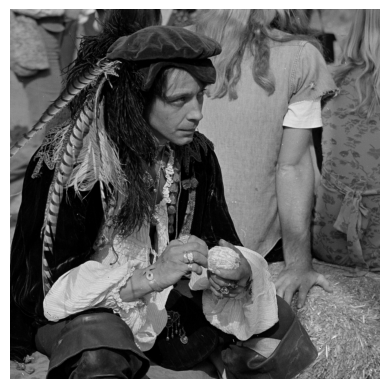

./Dataset/lungs.pgm


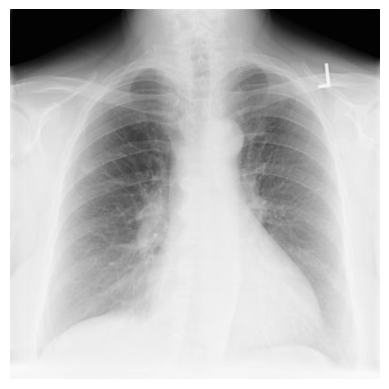

./Dataset/clown.pgm


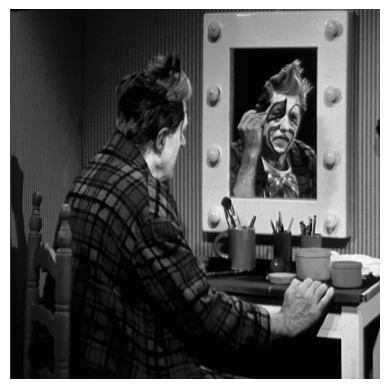

./Dataset/clock.pgm


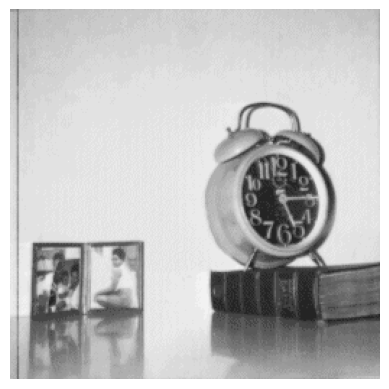

./Dataset/kiel.pgm


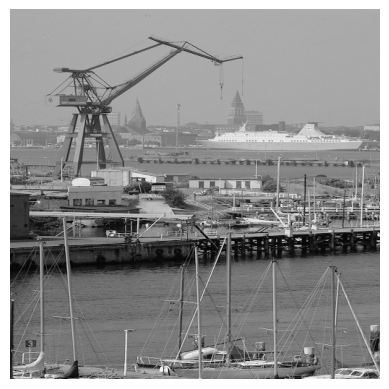

./Dataset/zelda2.pgm


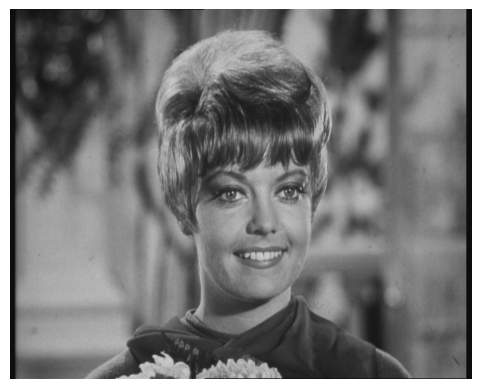

./Dataset/dogbone.pgm


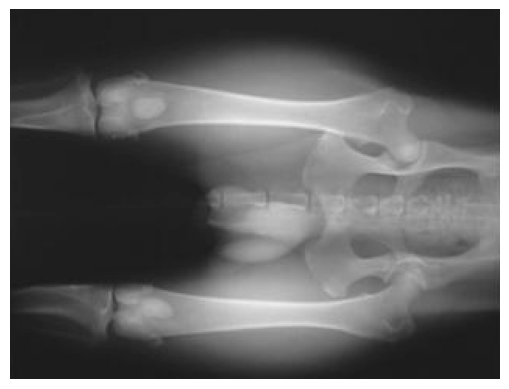

./Dataset/truck.pgm


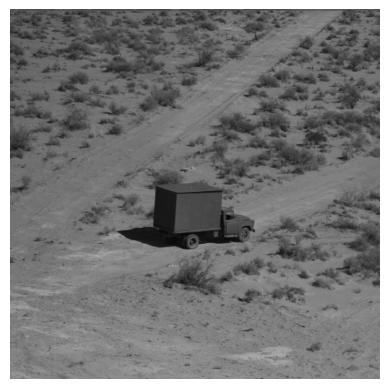

./Dataset/couple.pgm


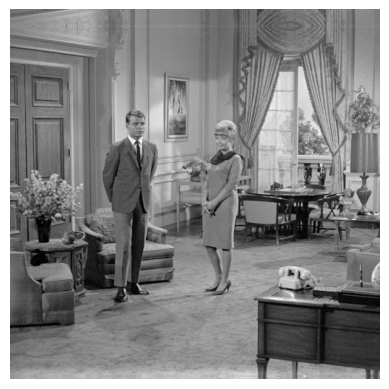

./Dataset/mandrill.pgm


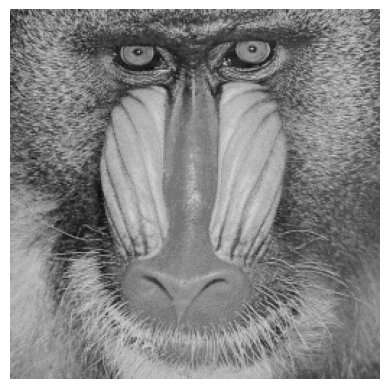

./Dataset/boats.pgm


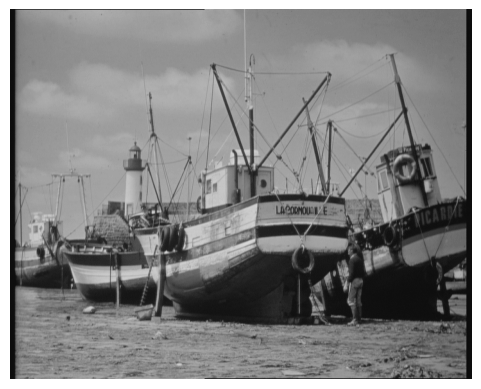

./Dataset/cameraman.pgm


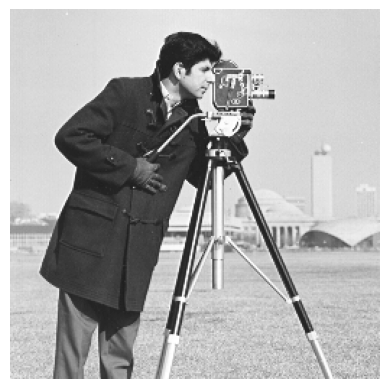

./Dataset/crowd.pgm


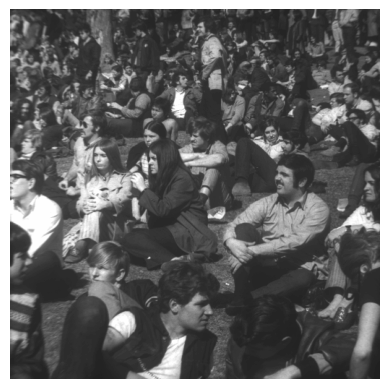

./Dataset/girlface.pgm


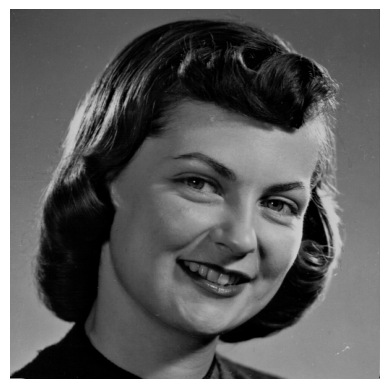

./Dataset/houses.pgm


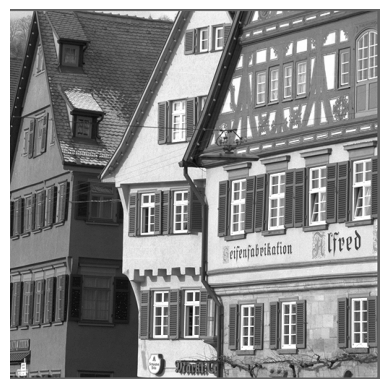

./Dataset/Brain1.pgm


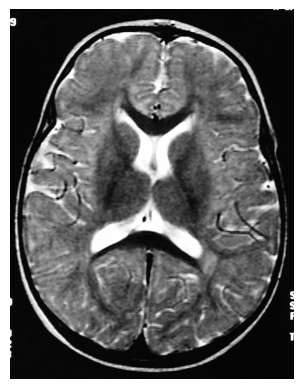

./Dataset/barbara.pgm


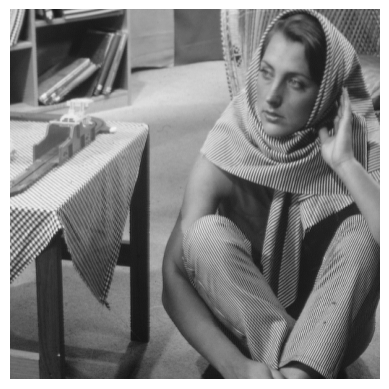

./Dataset/lighthouse.pgm


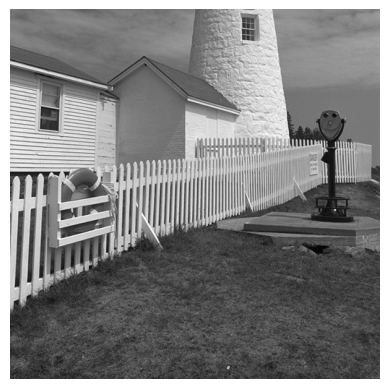

./Dataset/bridge.pgm


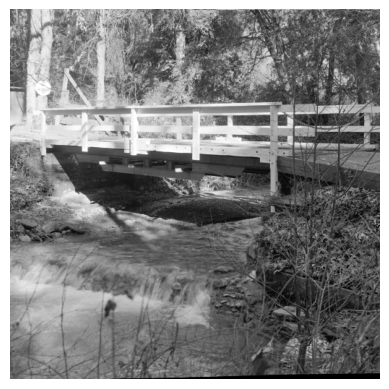

In [54]:
dataset_directory = './Dataset'
for filename in os.listdir(dataset_directory):
    if filename.endswith(".pgm"):
        file_with_directory = dataset_directory + "/" + filename
        print(file_with_directory)
        im = convert_pgm_to_matrix(file_with_directory)
        show_image_greyscale(im)